## Position MPS

In [2]:
# Prerequisites
import numpy as np
from seemps.state import MPS


def tensors2vector(tensors):
    mps = MPS(tensors)
    vector = mps.to_vector()
    return vector

### 1. Accumulation

Codify the vector [1,2,3,4,5,6,7,8]

In [12]:
# Hint: bit positions
# [1,    2,    3,    4,    5,    6,    7,    8]
# [000,  001,  010,  011,  100,  101,  110, 111]

N = 3

tensor_1 = np.zeros((1,2,2))
tensor_2 = np.zeros((2,2,2))
tensor_3 = np.zeros((2,2,1))

tensor_1[0,0,0] = 1
tensor_1[0,0,1] = 0
tensor_1[0,1,0] = 1
tensor_1[0,1,1] = 4

tensor_2[0,0,0] = 1
tensor_2[0,0,1] = 0
tensor_2[0,1,0] = 1
tensor_2[0,1,1] = 2
tensor_2[1,0,0] = 0
tensor_2[1,0,1] = 1
tensor_2[1,1,0] = 0
tensor_2[1,1,1] = 1

tensor_3[0,0,0] = 0
tensor_3[0,1,0] = 1
tensor_3[1,0,0] = 1
tensor_3[1,1,0] = 1

tensors2vector([tensor_1, tensor_2, tensor_3])

array([0., 1., 2., 3., 4., 5., 6., 7.])

Explanation:

It is based on the Schur complement:

$$ 
\begin{bmatrix}
    0 & a \\
    1 & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    0 & b \\
    1 & 1 \\
\end{bmatrix}  
=
\begin{bmatrix}
    0 & a + b \\
    1 & 1 \\
\end{bmatrix}  
$$

In [48]:
def count(sites):
    tensor_1 = np.zeros((1,2,2))
    tensor_1[0,:,:] = np.array([[[1, 0], [1, 2**(sites - 1)]]])

    tensors_bulk = [np.zeros((2,2,2)) for _ in range(sites - 2)]
    for i in range(len(tensors_bulk)):
        tensors_bulk[i][0,:,0] = np.ones(2)
        tensors_bulk[i][1,:,1] = np.ones(2)
        tensors_bulk[i][0,1,1] =  2**(sites - (i+2))

    tensor_2 = np.zeros((2,2,1))
    tensor_2[:,:,0] = np.array([[0, 1], [1, 1]])

    tensors = [tensor_1] + tensors_bulk + [tensor_2]
    return tensors

tensors2vector(count(4))

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

### 2. Position MPS

In [51]:
def position_mps(sites, start, stop, mesh_type = 'o'):
    if mesh_type == 'c':
        stop += (stop - start) / (2**sites - 1)
    step = (stop - start) / 2**sites
    tensor_1 = np.zeros((1,2,2))
    tensor_1[0,:,:] = np.array([[[1, start], [1, start + step * 2**(sites - 1)]]])

    tensors_bulk = [np.zeros((2,2,2)) for _ in range(sites - 2)]
    for i in range(len(tensors_bulk)):
        tensors_bulk[i][0,:,0] = np.ones(2)
        tensors_bulk[i][1,:,1] = np.ones(2)
        tensors_bulk[i][0,1,1] = step * 2**(sites - (i+2))

    tensor_2 = np.zeros((2,2,1))
    tensor_2[:,:,0] = np.array([[0, step], [1, 1]])

    tensors = [tensor_1] + tensors_bulk + [tensor_2]
    return tensors

tensors2vector(position_mps(4, -1, 1, mesh_type='c'))
    

array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
       -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
        0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
        1.        ])

### 3. Exponential MPS

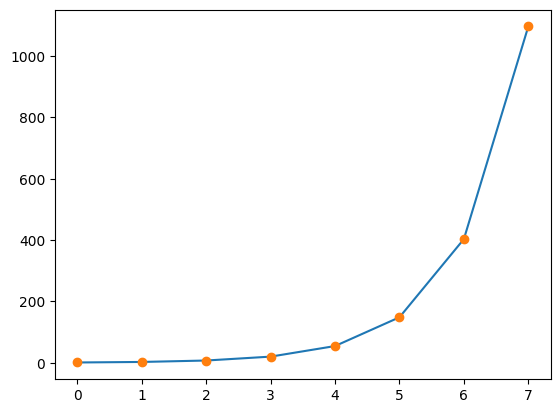

In [61]:
# Hint: bit positions
# [1,    2,    3,    4,    5,    6,    7,    8]
# [000,  001,  010,  011,  100,  101,  110, 111]

N = 3

tensor_1 = np.zeros((1,2,1))
tensor_2 = np.zeros((1,2,1))
tensor_3 = np.zeros((1,2,1))

tensor_1[0,0,0] = 1
tensor_1[0,1,0] = np.exp(2**(N-1))

tensor_2[0,0,0] = 1
tensor_2[0,1,0] = np.exp(2**(N-2))

tensor_3[0,0,0] = 1
tensor_3[0,1,0] = np.exp(2**(N-3))

vector = tensors2vector([tensor_1, tensor_2, tensor_3])

import matplotlib.pyplot as plt
plt.plot(range(2**N), np.exp(range(2**N)))
plt.plot(range(2**N), vector, 'o')


In [ ]:
def exponential_mps(sites, start, stop, c=1):
    tensors = [np.array([1, np.exp(N-i)]) for i in range]
    

### 4. Logarithm MPS